In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NCEDCdata.csv')
data.describe()

,Lat,Lon,Depth,Mag,Nst,Gap,Clo,RMS,Event ID
count,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2799.000000,2.799000e+03
mean,37.226104,-119.995539,6.486720,2.512176,30.489461,119.868882,14.202572,0.131597,7.322216e+07
std,1.649315,2.318310,7.328887,0.445542,26.466518,67.518041,17.008724,0.158346,1.313775e+05
min,34.519330,-125.910160,-2.250000,2.000000,4.000000,16.000000,0.000000,0.000000,7.111009e+07
25%,36.089670,-122.009750,1.690000,2.190000,9.000000,69.000000,3.000000,0.060000,7.318831e+07
50%,36.431000,-118.874500,4.750000,2.410000,23.000000,104.000000,9.000000,0.090000,7.322798e+07
75%,38.757000,-117.890500,8.750000,2.700000,45.000000,159.000000,19.000000,0.140000,7.327119e+07
max,41.891170,-117.760170,55.650000,5.580000,245.000000,352.000000,160.000000,2.580000,7.332190e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2799 non-null   object 
 1   Time           2799 non-null   object 
 2        Lat       2799 non-null   float64
 3          Lon     2799 non-null   float64
 4    Depth         2799 non-null   float64
 5    Mag           2799 non-null   float64
 6   Magt           2799 non-null   object 
 7   Nst            2799 non-null   float64
 8   Gap            2799 non-null   float64
 9   Clo            2799 non-null   float64
 10   RMS           2799 non-null   float64
 11   SRC           2799 non-null   object 
 12  Event ID       2799 non-null   float64
dtypes: float64(9), object(4)
memory usage: 284.5+ KB


In [ ]:
data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019/01/01,06:33:03.59,35.87267,-121.41167,9.16,2.22,Md,38.0,190.0,22.0,0.07,NCSN,73129046.0
2,2019/01/01,08:16:00.70,37.97066,-122.34917,4.96,2.28,Md,92.0,18.0,4.0,0.16,NCSN,73129051.0
3,2019/01/01,13:58:08.02,37.30700,-120.00317,15.86,2.10,Md,11.0,141.0,26.0,0.15,NCSN,73129111.0
4,2019/01/01,22:59:54.86,40.88700,-123.47767,22.66,3.26,ML,85.0,30.0,22.0,0.18,NCSN,73129211.0


In [ ]:
#remove empty row
data = data.drop(index=0)

In [ ]:
data.head()

,Date,Time,Lat,Lon,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,Event ID
1,2019/01/01,06:33:03.59,35.87267,-121.41167,9.16,2.22,Md,38.0,190.0,22.0,0.07,NCSN,73129046.0
2,2019/01/01,08:16:00.70,37.97066,-122.34917,4.96,2.28,Md,92.0,18.0,4.0,0.16,NCSN,73129051.0
3,2019/01/01,13:58:08.02,37.30700,-120.00317,15.86,2.10,Md,11.0,141.0,26.0,0.15,NCSN,73129111.0
4,2019/01/01,22:59:54.86,40.88700,-123.47767,22.66,3.26,ML,85.0,30.0,22.0,0.18,NCSN,73129211.0
5,2019/01/01,23:36:16.51,38.80700,-122.82317,1.14,2.07,Md,45.0,40.0,1.0,0.06,NCSN,73129216.0


In [ ]:
data.shape

(2799, 13)

The dataset is realatively large with 2799 recorded earthquakes in the year 2019 in Northern California.

In [ ]:
print(data.columns)

Index(['Date       ', 'Time         ', '     Lat ', '       Lon  ', ' Depth  ',
       ' Mag ', 'Magt  ', 'Nst ', 'Gap  ', 'Clo ', ' RMS ', ' SRC   ',
       'Event ID'],
      dtype='object')


In [ ]:
#clean up column names
data.rename(columns={'Date       ':'date',
                   'Time         ':'time',
                    '     Lat ':'lat',
                    '       Lon  ':'lon',
                    ' Depth  ':'depth',
                    ' Mag ':'magnitude',
                    'Nst ':'stations',
                    'Gap  ':'gap',
                    'Clo ':'closeness',
                    ' SRC   ':'source',
                    'Magt  ':'mag type'}, inplace=True)

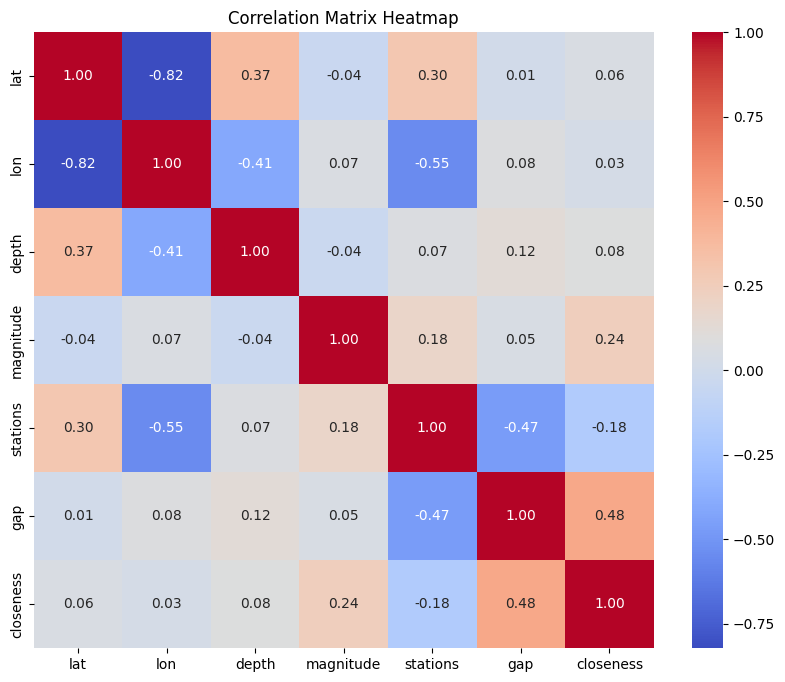

In [ ]:
#select numerical features for correlation analysis
numerical_features = ['lat', 'lon', 'depth', 'magnitude', 'stations', 'gap', 'closeness']
correlation_matrix = data[numerical_features].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The correlation matrix heat map shows that there is no strong correlation between the measured earthquake detphs, magnitudes, closeness to the epicenters, etc.

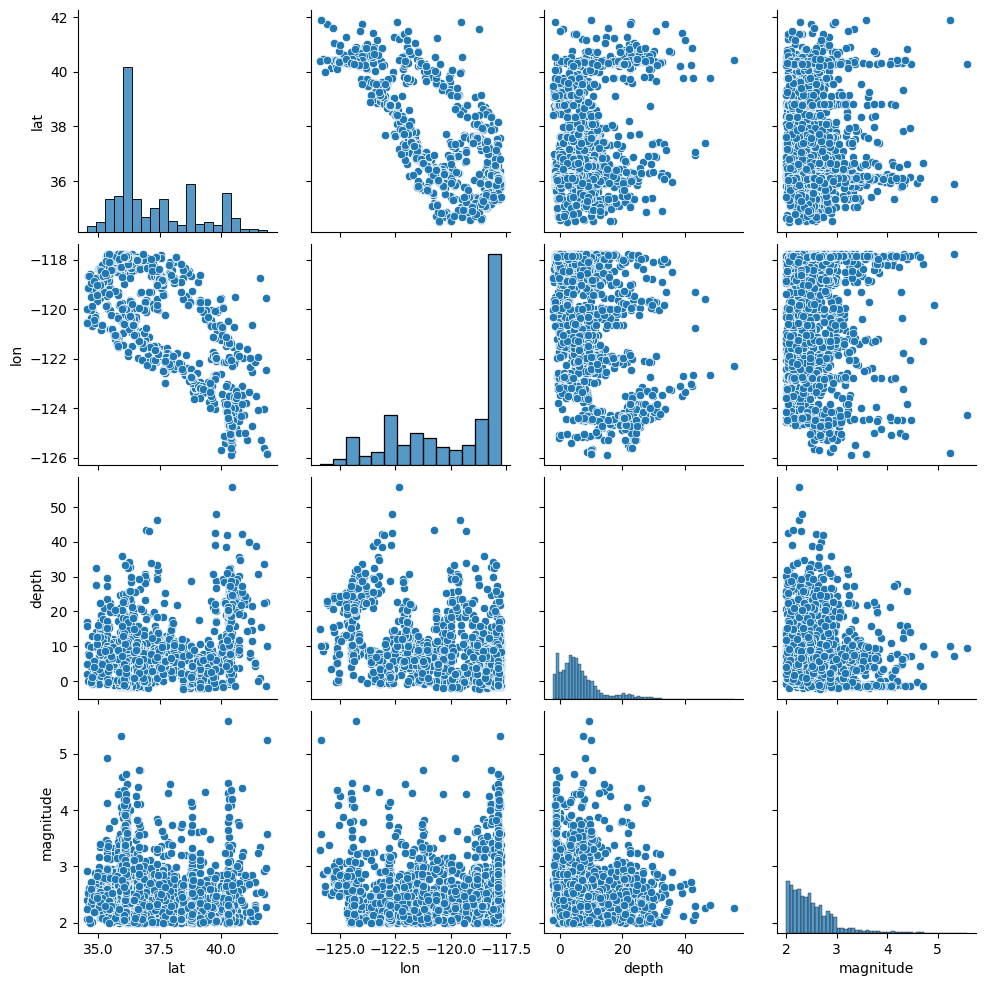

In [ ]:
# create the pair plot with key features
key_features = ['lat', 'lon', 'depth', 'magnitude']
sns.pairplot(data[key_features])
plt.show()

<ipython-input-61-b940703bda6b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['magnitude'], shade=True)


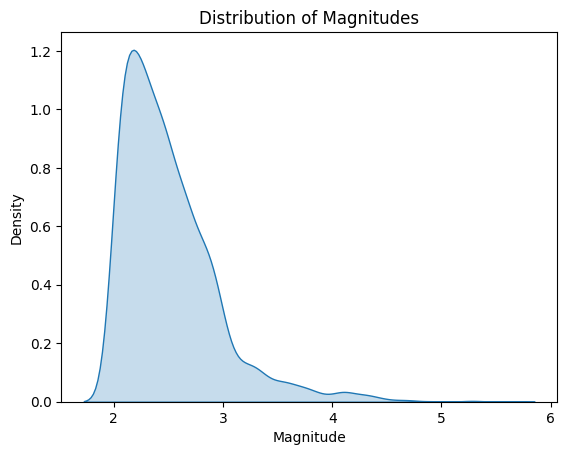

In [ ]:
#density plot to show distribution of magnitudes
sns.kdeplot(data['magnitude'], shade=True)
plt.title('Distribution of Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.show()

This graph shows that the data is skewed to the right and that the majority of earthquakes recorded were between a magnitude of 2 and 3.

<ipython-input-63-3ca51a7b4c10>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['depth'], shade=True)


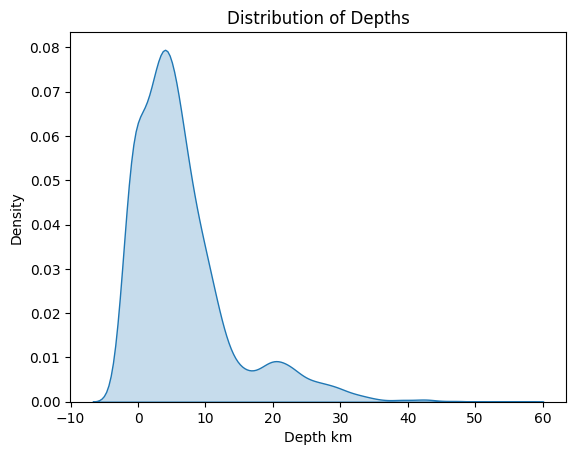

In [ ]:
#density plot to show distribution of depths
sns.kdeplot(data['depth'], shade=True)
plt.title('Distribution of Depths')
plt.xlabel('Depth km')
plt.ylabel('Density')
plt.show()

This graph is skewed to the right and shows that the majority of earthquakes recorded occured at a depth between 0 and 10 km deep.

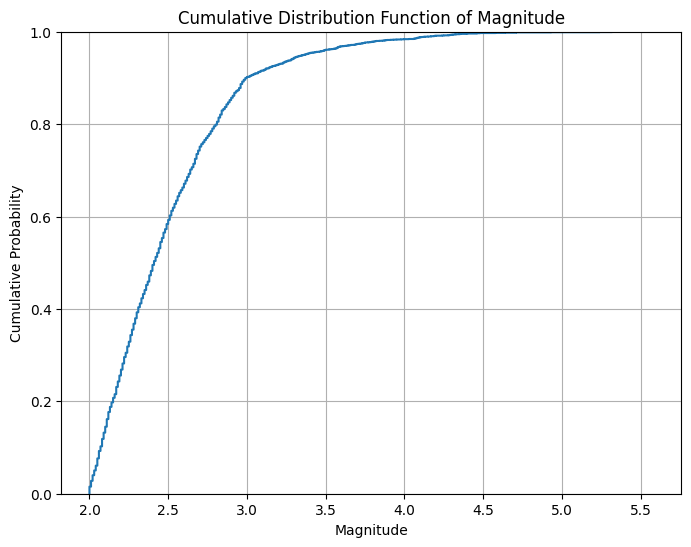

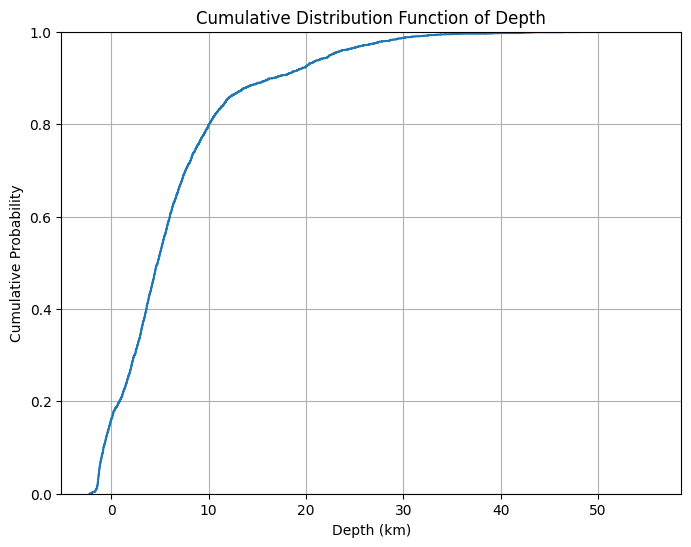

In [ ]:
#create the CDF plot for magnitude
plt.figure(figsize=(8, 6))
sns.ecdfplot(data['magnitude'])
plt.title('Cumulative Distribution Function of Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

#create the CDF plot for depth
plt.figure(figsize=(8, 6))
sns.ecdfplot(data['depth'])
plt.title('Cumulative Distribution Function of Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

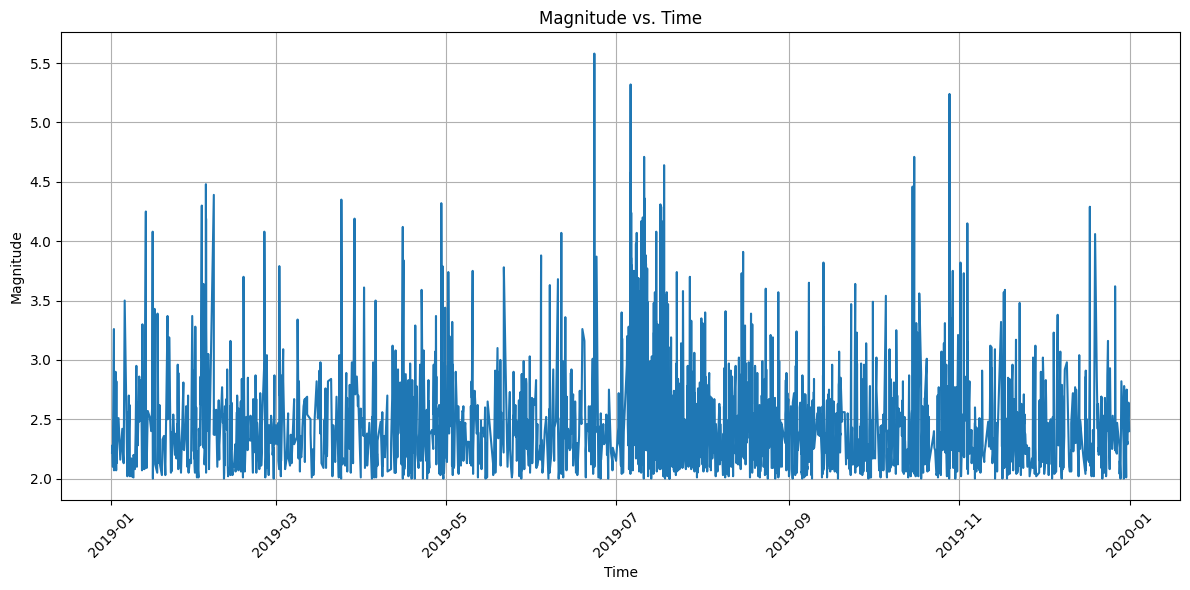

In [ ]:
#convert the date and time columns to datetime objects
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])

#set the datetime column as the index
data = data.set_index('datetime')

#plot magnitude vs. time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['magnitude'])
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Magnitude vs. Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot shows the magnitude of earthquakes over the year 2019. It shows an increase in frequency and magnitude around the month of July.

Moving forward I hope to find if there is any correlation between time passed and likelihood of a repeat event.